1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.

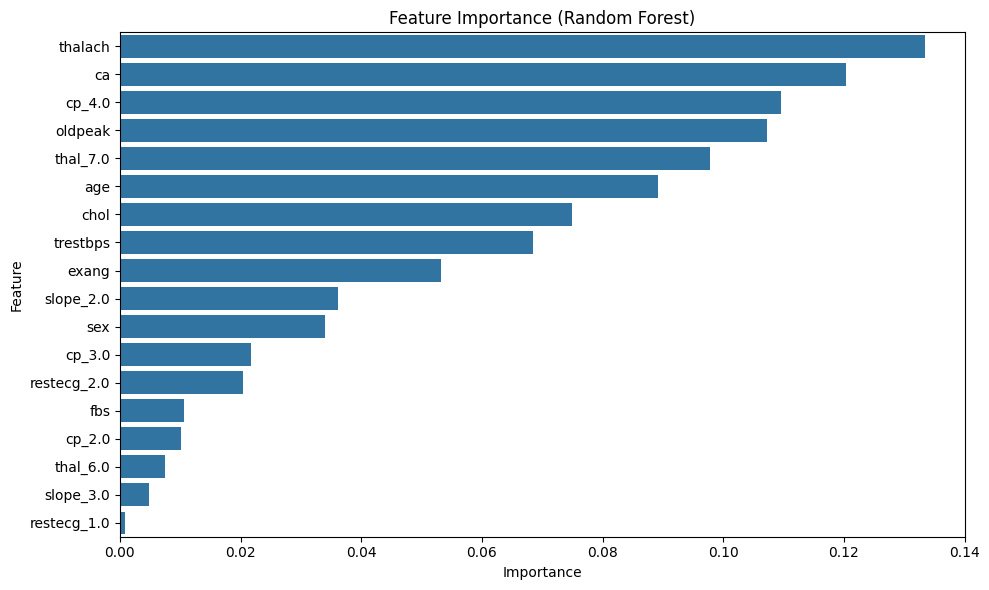

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv('..\data\heart_disease_cleaned.csv')

y = df['target']
X = df.drop('target', axis=1)

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

2. Apply Recursive Feature Elimination (RFE) to select the best predictors.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X, y)

selected_rfe_features = X.columns[rfe.support_]
print("RFE Selected Features:")
print(selected_rfe_features)

RFE Selected Features:
Index(['sex', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_2.0',
       'cp_4.0', 'slope_2.0', 'thal_7.0'],
      dtype='object')


3. Use Chi-Square Test to check feature significance.

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_scaled, y)

selected_chi2_features = X.columns[chi2_selector.get_support()]
print("Chi-Square Selected Features:")
print(selected_chi2_features)

Chi-Square Selected Features:
Index(['sex', 'exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_2.0', 'slope_2.0', 'thal_7.0'],
      dtype='object')


4. Select only the most relevant features for modeling.

In [16]:
final_selected_features = list(set(selected_rfe_features) & set(selected_chi2_features))
print("Final Selected Features (intersection):")
print(final_selected_features)

X_reduced = X[final_selected_features]
print("\nReduced Feature Set:")
print(X_reduced.head())

X_reduced_with_target = X_reduced.copy()
X_reduced_with_target['target'] = y
X_reduced_with_target.to_csv("../data/X_reduced_with_target.csv", index=False)

Final Selected Features (intersection):
['oldpeak', 'cp_2.0', 'sex', 'exang', 'cp_4.0', 'ca', 'slope_2.0', 'thal_7.0']

Reduced Feature Set:
    oldpeak    cp_2.0       sex     exang    cp_4.0        ca  slope_2.0  \
0  1.087338 -0.444554  0.686202 -0.696631 -0.951662 -0.711131  -0.926766   
1  0.397182 -0.444554  0.686202  1.435481  1.050793  2.504881   1.079021   
2  1.346147 -0.444554  0.686202  1.435481  1.050793  1.432877   1.079021   
3  2.122573 -0.444554  0.686202 -0.696631 -0.951662 -0.711131  -0.926766   
4  0.310912  2.249444 -1.457296 -0.696631 -0.951662 -0.711131  -0.926766   

   thal_7.0  
0 -0.793116  
1 -0.793116  
2  1.260850  
3 -0.793116  
4 -0.793116  
